Which education pathway leaves you in a better financial position at retirement at the age of 50? Going to CU Boulder for a B.S. In CS or going to D.U.?

The simulation tracks acceptance rate, graduation rate, and living expenses. A student’s journey includes earnings and costs from ages 18 to 50, with income increasing if they graduate. The outcome is the savings remaining at age 50. 

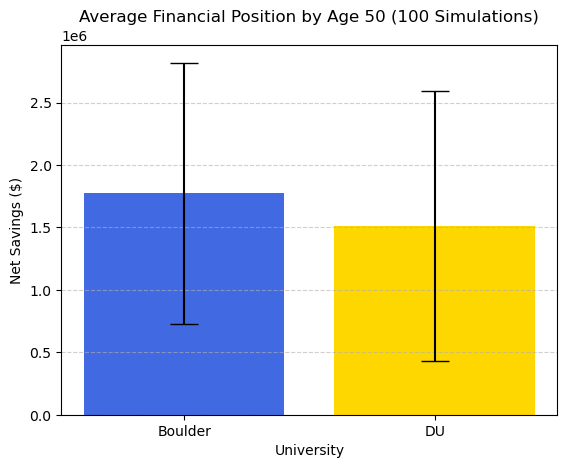

Simulation Results (100 runs):
Boulder: Average = $1,773,550.00,  STD = $1,045,271.33
DU: Average = $1,513,750.00,  STD = $1,082,283.48


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
years_total = 50 - 18  # years from 18 to 50
n_simulations = 100

# University data
universities = {
    "Boulder": {"acceptance": 0.833, "graduation": 0.73},
    "DU": {"acceptance": 0.778, "graduation": 0.75}
}

# Average U.S. living expenses (simplified yearly averages)
housing = 15000   # rent or dorm
food = 6000       # food per year
books = 1200      # books and supplies
living_expenses = housing + food + books

# Average annual incomes (approximate U.S. averages)
beginner_income = 35000
middle_income = 70000
senior_income = 120000

def simulate_university_finances(acceptance_rate, graduation_rate):
    accepted = np.random.rand() < acceptance_rate
    if not accepted:
        # Not accepted — find another path (no degree, beginner income only)
        income = beginner_income * years_total
        expenses = living_expenses * years_total
        return income - expenses

    graduated = np.random.rand() < graduation_rate
    if graduated:
        # Income by career stage
        income = (
            beginner_income * 5 + 
            middle_income * 5 + 
            senior_income * 23
        )
    else:
        # Never advances career
        income = beginner_income * years_total
    
    expenses = living_expenses * years_total
    return income - expenses

# Run simulations
results = {uni: [] for uni in universities}
for i in range(n_simulations):
    for uni, data in universities.items():
        net = simulate_university_finances(data["acceptance"], data["graduation"])
        results[uni].append(net)

# Calculate averages and standard deviations
avg_finances = {uni: np.mean(vals) for uni, vals in results.items()}
std_finances = {uni: np.std(vals) for uni, vals in results.items()}

# Plot bar chart with error bars for standard deviation
plt.bar(avg_finances.keys(), avg_finances.values(), 
        yerr=[std_finances[u] for u in avg_finances.keys()],
        capsize=10, color=['royalblue', 'gold'])
plt.title("Average Financial Position by Age 50 (100 Simulations)")
plt.ylabel("Net Savings ($)")
plt.xlabel("University")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Print numerical results
print("Simulation Results (100 runs):")
for uni in avg_finances:
    print(f"{uni}: Average = ${avg_finances[uni]:,.2f},  STD = ${std_finances[uni]:,.2f}")

Comparing CU Boulder and DU from age 18 to 50, Boulder students earn slightly more by age 50. Boulder graduates have a 60.8% graduation rate and can expect to earn around $1.86 million, while DU graduates have a 58.3% chance and can expect about $1.80 million. After 100 simulations, Boulder still leads on average ($1,773,550). Regarding standard deviation (STD), this means the actual outcome can vary. For Boulder, you could have $1,045,271.33 more or less than the average. For DU, the deviation is $1,082,283.48.